![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)

#**TC4033**

##**Visión computacional para imágenes y video**
##**2.6 Google Colab -  Image enhancement**

##**Docentes:** Dr. Gilberto Ochoa Ruiz, Mtra. María Guadalupe Marcos Abularach

##**Equipo 30:**
- Julio Baltazar Colín: A01794476
- Julio Osvaldo Hernández Bucio: A01794366
- Helmy Andrea Moreno Navarro: A01793918
- Maricel Parra Osorio - A01793932
- Yeison Fernando Villamil Franco: A01793803

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [36]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

<ipython-input-36-0238ad4d13f7>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gauss
<ipython-input-36-0238ad4d13f7>:8: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as med


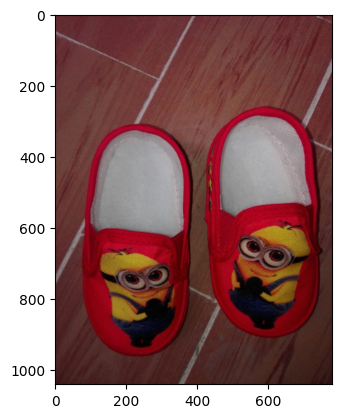

In [37]:
original_image = Image.open('data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

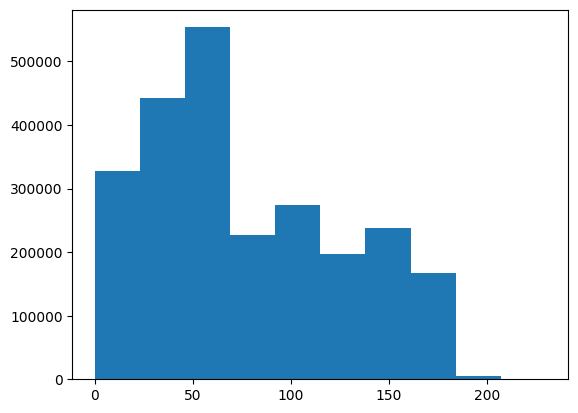

In [38]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

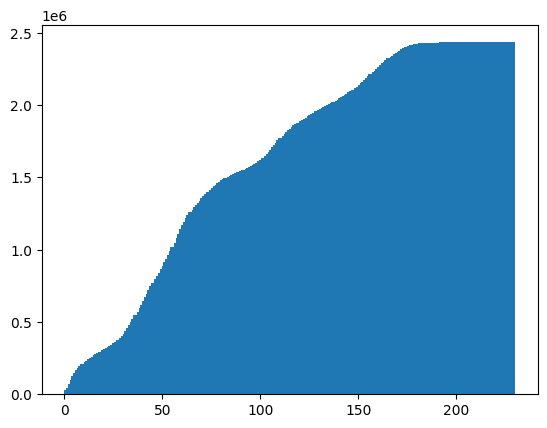

In [39]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


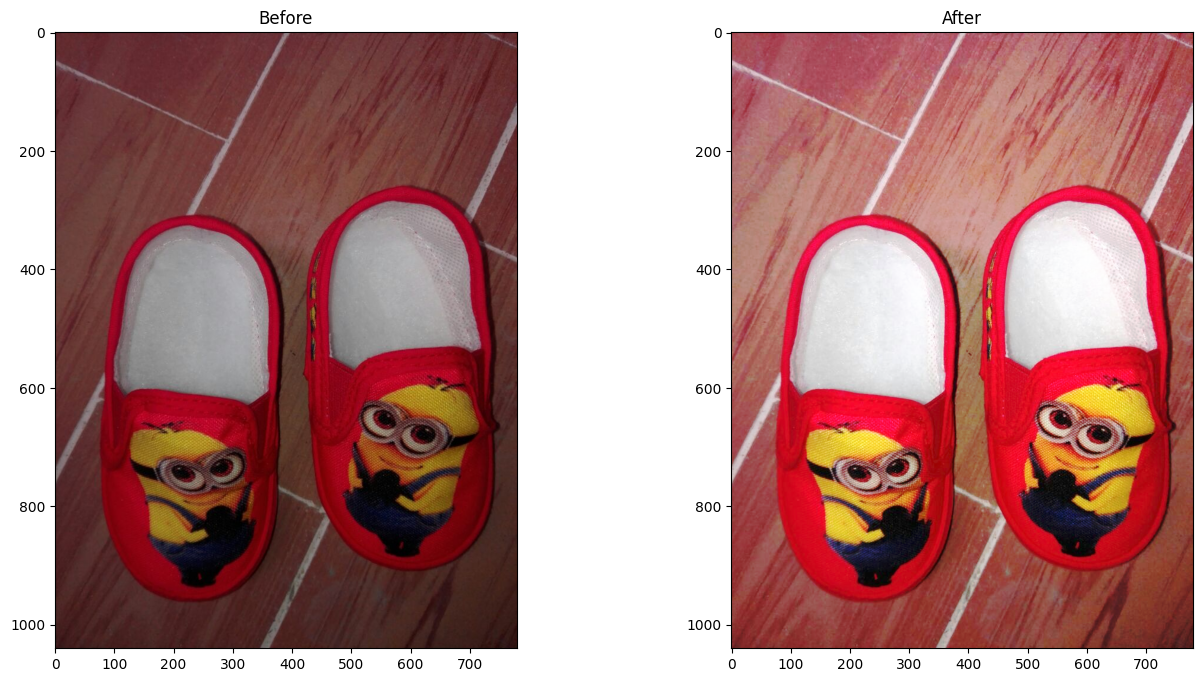

In [40]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

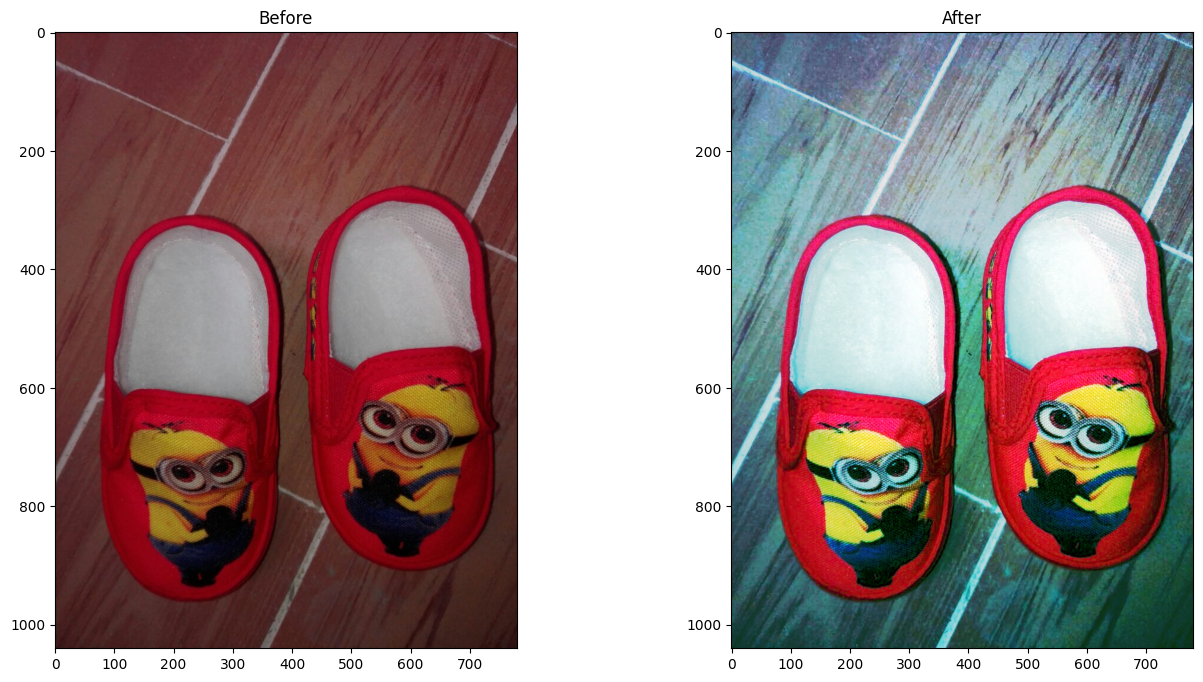

In [41]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

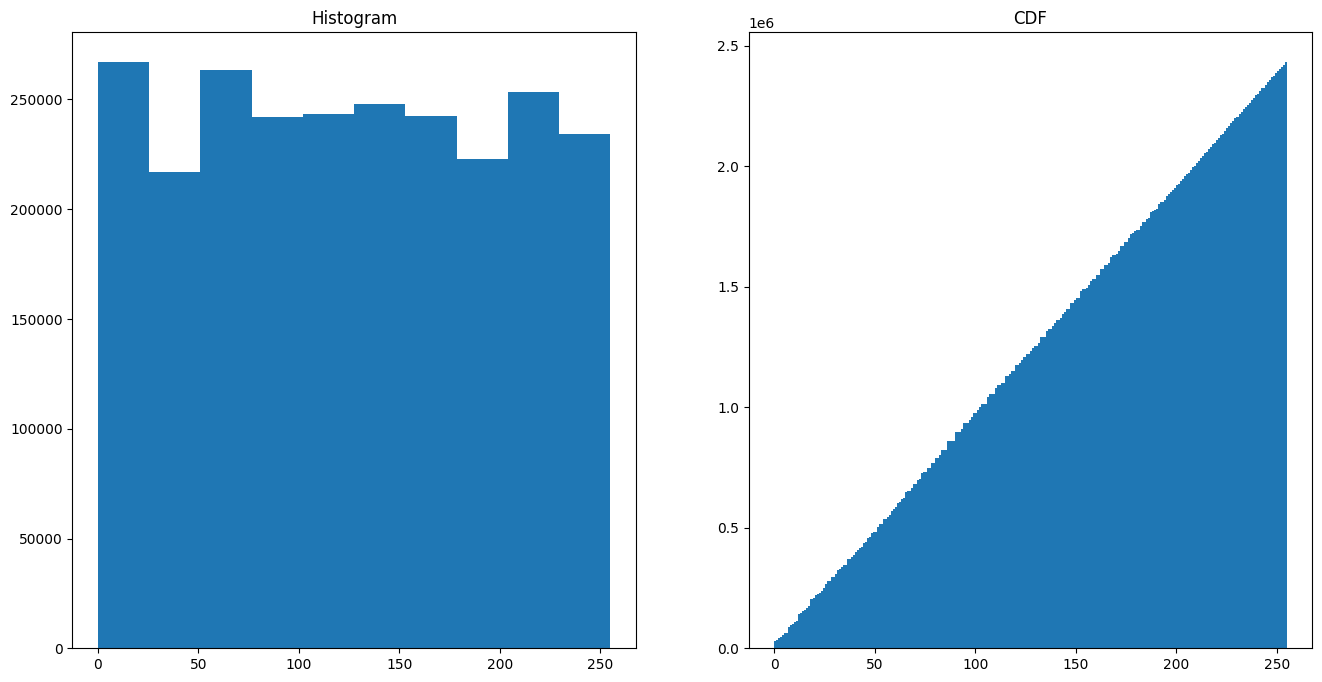

In [42]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

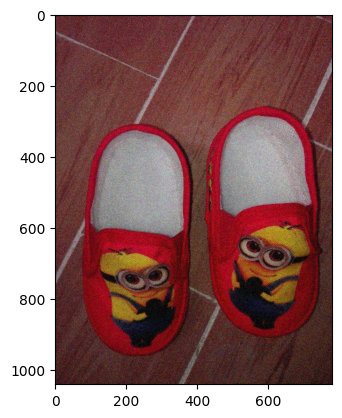

In [43]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

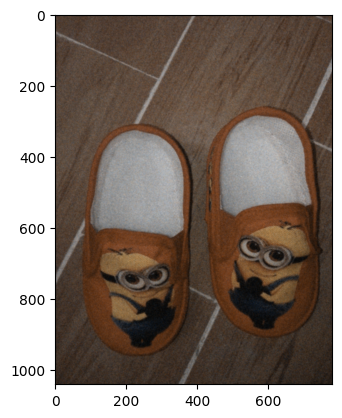

In [44]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

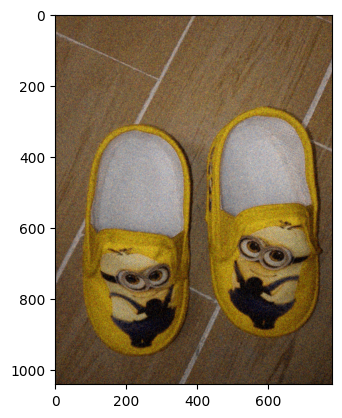

In [45]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## **Challenge** <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [57]:
!pip install image_slicer

In [47]:
from image_slicer import slice

n = 4
slice('data/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

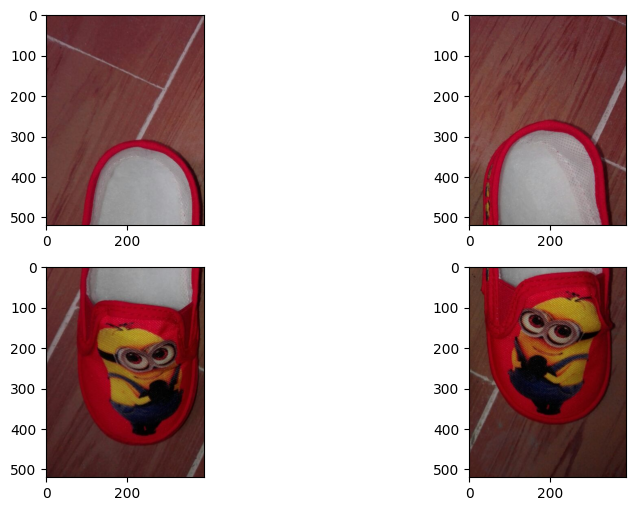

In [48]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

#**Práctica**

> 1. Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, **¿Cómo podría mejorarse?**



> **2. Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.**



### **Sliding Window Adaptive Histogram Equalization (SWAHE)**

Para comenzar desglosaremos este método de la siguiente manera:
Inicialmente, el objetivo de la **ecualización del histograma** es distribuir los valores del nivel de grises de la manera más uniforme posible.  Para ello trabaja con la siguiente operación:

$${\displaystyle v(i,j)={\frac {Fu(u(i,j)-Fu(a))}{1-Fu(a)}}(L-1)+0.5}$$

Sin embargo, esta no puede ser manipulada sin ser *especificado el histograma* para poder definirlo y modificarlo según lo requerido, de acuerdo a unos pasos dados.

![Evidence 3](https://i.imgur.com/zlMwokz.jpg)
> IMG 1. Tomada del libro: Capítulo 6. Procesamiento Digital de Imágenes. R. González y R. Woods. 4° Edición. Pearson.[1]

Ahora bien, para mejorar la calidad de la imagen es necesario aplicar una técnica llamada ACE (Mejora Adaptativa del Contraste), lo cual, para ajustar el contraste de la imagen redistribuye los valores de los pixeles [2] de la siguiente manera:

$$ACE(x,y) = \frac{I(x,y) - G(x,y)}{[G(x,y) + k]}$$

donde I(x,y) es la imagen original, G(x,y) es la imagen filtrada de baja frecuencia, k es una constante de normalización y (x,y) son las coordenadas de los píxeles en la imagen. [3]

> Prácticamente podríamos decir que el método ***Sliding Window Adaptive Histogram Equalization (SWAHE)*** Mejora imágenes, ajusta contraste,redistribuye píxeles, basada en AHE, divide en ventanas, aplicada individualmente, realiza detalles de las imágenes. Al optimizar la calidad ajusta el contraste mediante redistribución de valores en histogramas. Esta es una versión mejorada de AHE, trabaja con secciones menores de imagen para resultados más precisos y detallados, ampliamente empleada en mejora visual de imágenes.

> *"El método utilizado consiste en **especificar un tamaño de bloque** y **mover su centro de un píxel a otro**. En cada ubicación, el píxel central se modifica según su **vecindad local**. Con este método, solo cambia una fila o columna de datos de píxeles a medida que nos movemos a través o hacia abajo de la imagen, lo que permite una implementación eficiente al calcular el histograma. A este método lo llamamos **enfoque de ventana deslizante**, como se muestra en la siguiente Figura:"* [4]


![Evidence 4](https://i.imgur.com/SuqfMkD.jpg)


> **Processing with a sliding window**: (a) Usando una ventana N × N , se realiza la operación y la salida se coloca en la ubicación x , correspondiente al centro de la ventana. (b) La ventana se mueve un píxel hacia la derecha y la operación se realiza nuevamente y el valor procesado se coloca en la imagen de salida en la ubicación correspondiente. (c) al final de la fila, bajamos una fila y repetimos, y (d) este proceso continúa hasta que se procesa toda la imagen. Tenga en cuenta que las filas y columnas exteriores no se procesan.[4]


[1] IMG 1: *Ecualización del histograma* Tomada del libro: Capítulo 6. Procesamiento Digital de Imágenes. R. González y R. Woods. 4° Edición. Pearson.

[2] Programador clic. Artículo: Mejora adaptativa del contraste (ACE). Visto en: https://programmerclick.com/article/63971360507/

[3] PEREGRINA BARRETO, Hayde  y  TEROL VILLALOBOS, Iván R. Mejora de contraste basada en un algoritmo morfológico racional multiescala. Comp. y Sist. [online]. 2011, vol.14, n.3, pp.253-267. ISSN 2007-9737. Visto en: https://www.scielo.org.mx/scielo.php?pid=S1405-55462011000100005&script=sci_abstract

[4] IMG 2. *Processing with a sliding window* Tomada del libro: Capítulo 6. Procesamiento Digital de Imágenes. R. González y R. Woods. 4° Edición. Pearson.


#**Implementación**

In [49]:
!pip install numpy

In [50]:
!pip install opencv-python

In [51]:
!pip install matplotlib

In [52]:
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np

- Se define la función para realizar la impresión de las imágenes, tanto de la original como se explicaba en el texto anterior como la transformada.

In [53]:
# Función para imprimir las imagenes
def plot_images(orig_img, trans_img):
    plt.figure(figsize=([20, 20]))
    plt.subplot(121),plt.imshow(orig_img)
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(trans_img)
    plt.title('Imagen Transformada'), plt.xticks([]), plt.yticks([])

> La siguiente función **swahe** se escribe en Python haciendo uso de la biblioteca **OpenCV** para mejorar el contraste de una imagen.

- En primer lugar, **convertimos** la imagen de entrada al **espacio de color HSV**, separa sus canales y luego se aplica la técnica **CLAHE** a los canales de saturación y valor. CLAHE esta es una técnica que mejora el contraste de diferentes regiones de la imagen. Después, los canales modificados se combinan de nuevo en la imagen HSV, que **se convierte de vuelta al espacio de color BGR**. La función devuelve **la imagen procesada.**

 Ahora, aplicamos la función **swahe** utilizando la función llamada plot_images para mostrar **la imagen original y la procesada** para **compararlas**. Esta función es útil para realizar el contraste de una imagen, especialmente en los canales de saturación y valor.

In [59]:
#Se define la función para SWAHE

def swahe(entrada_imagen):
    # Convertir la imagen a HSV
    hsv = cv2.cvtColor(entrada_imagen, cv2.COLOR_BGR2HSV)
    hue, sat, val = cv2.split(hsv)

    # Ajustar la saturación y los valores de los canales
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
    sat = clahe.apply(sat)
    val = clahe.apply(val)
    hsv[..., 1] = sat
    hsv[..., 2] = val
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

original_img = cv2.imread('data/image.jpg')
swahe_img = swahe(original_img)

plot_images(original_img, swahe_img)

Output hidden; open in https://colab.research.google.com to view.

- Definimos la función para el histograma de la imagen.

In [55]:
def plotRGBHistogram(colorImage):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr, _ = np.histogram(colorImage[:,:,i],255,[0,255])
        plt.plot(histr,color = col)
        plt.xlim([0,255])
    plt.show()

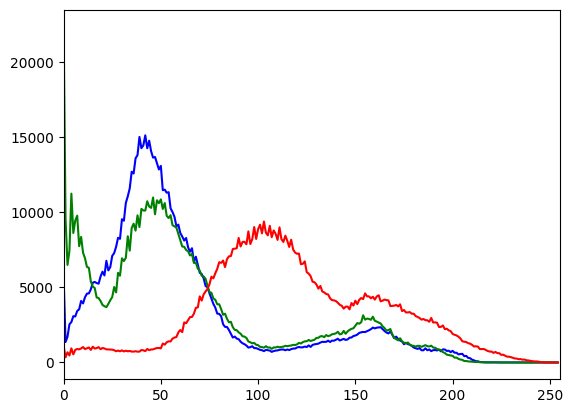

In [56]:
plotRGBHistogram(swahe_img)